In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
%matplotlib inline

In [2]:
#1. Importer le dataset 
indeed = pd.read_csv('indeed_job_dataset.csv')

In [3]:
indeed.shape

(5715, 43)

In [4]:
indeed.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [5]:
indeed.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
indeed['Queried_Salary']

0        <80000
1        <80000
2        <80000
3        <80000
4        <80000
         ...   
5710    >160000
5711    >160000
5712    >160000
5713    >160000
5714    >160000
Name: Queried_Salary, Length: 5715, dtype: object

# Modèle RL with salary_relevant_rows.csv

In [7]:
salary = pd.read_csv('salary_relevant_rows.csv')

In [8]:
salary.shape

(203, 6)

In [9]:
salary.head()

,location,job,comp,salary,anual_salary,city
0,"Houston, TX",Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,"Houston, TX",Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,"Tempe, AZ",Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,"Phoenix, AZ 85003 (Central City area)",Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


In [10]:
salary.columns

Index(['location', 'job', 'comp', 'salary', 'anual_salary', 'city'], dtype='object')

In [11]:
#67 villes
salary['location'].value_counts()

New York, NY                                   22
Chicago, IL                                    15
Los Angeles, CA                                14
Seattle, WA                                    13
Austin, TX                                     13
                                               ..
Richardson, TX                                  1
Burbank, CA                                     1
Aurora, CO                                      1
Denver, CO 80204 (Central West Denver area)     1
Irving, TX 75063                                1
Name: location, Length: 67, dtype: int64

In [14]:
#185 jobs différents (avec un titre différent)
salary['job'].value_counts()

Research Analyst                                                  8
Senior Data Scientist                                             3
Quantitative Research Analyst                                     2
SUPERVISING CLINICAL LABORATORY SCIENTIST III                     2
Quantitative Analyst - Multiple Vacancies                         2
                                                                 ..
Lead Statistical Programmer                                       1
Equity Research Analyst дус Healthcare                            1
Data Analyst, Bureau of Primary Care Access & Planning (PCAP)     1
Senior Environmental Surveillance Analyst, Bureau of Childcare    1
Senior Quantitative Risk Analyst                                  1
Name: job, Length: 185, dtype: int64

In [12]:
salary.location.nunique

<bound method IndexOpsMixin.nunique of 0                                Houston, TX
1                                Houston, TX
2                                  Tempe, AZ
3      Phoenix, AZ 85003 (Central City area)
4                                Phoenix, AZ
                       ...                  
198      Charlotte, NC 28203 (Dilworth area)
199                         Coral Gables, FL
200                               Austin, TX
201                               Austin, TX
202                             Portland, OR
Name: location, Length: 203, dtype: object>

In [13]:
salary.job.nunique

<bound method IndexOpsMixin.nunique of 0                          Research Financial Analyst II
1                          Sr. Bioinformatics Programmer
2                               Data Analysis Specialist
3                                       Research Analyst
4                       RESEARCH AND STATISTICAL ANALYST
                             ...                        
198                       Senior Data Science Consultant
199                                  Assistant Scientist
200                                   Research Scientist
201    Research Engineering/ Scientist Associate III ...
202                                    Fishery Biologist
Name: job, Length: 203, dtype: object>

In [16]:
#variables X et Y
X = salary[['location', 'job']]
X.head()

,location,job
0,"Houston, TX",Research Financial Analyst II
1,"Houston, TX",Sr. Bioinformatics Programmer
2,"Tempe, AZ",Data Analysis Specialist
3,"Phoenix, AZ 85003 (Central City area)",Research Analyst
4,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST


In [17]:
#variable à predire
y = salary['anual_salary']
y.head()

0    65000.0
1    80500.0
2    53738.0
3    63617.0
4    47741.5
Name: anual_salary, dtype: float64

# villes en int

In [18]:
colonnes = pd.get_dummies(salary['location'])
colonnes.head()

,"Atlanta, GA","Atlanta, GA 30341","Aurora, CO","Aurora, CO 80011 (Norfolk Glen area)","Austin, TX","Azusa, CA","Bellevue, WA","Belmont, CA","Berkeley, CA","Boulder, CO",...,"Richardson, TX","Rowland Heights, CA 91748","San Francisco, CA","San Francisco, CA 94105 (Financial District area)","San Francisco, CA 94124 (Bayview area)","Scottsdale, AZ","Seattle, WA","Smyrna, GA 30082","Spring House, PA","Tempe, AZ"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#fusionner les nouvelles colonnes avec le dataset
new_salary = pd.concat([colonnes, salary], axis=1)
new_salary.head()

,"Atlanta, GA","Atlanta, GA 30341","Aurora, CO","Aurora, CO 80011 (Norfolk Glen area)","Austin, TX","Azusa, CA","Bellevue, WA","Belmont, CA","Berkeley, CA","Boulder, CO",...,"Seattle, WA","Smyrna, GA 30082","Spring House, PA","Tempe, AZ",location,job,comp,salary,anual_salary,city
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"Houston, TX",Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"Houston, TX",Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,"Tempe, AZ",Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"Phoenix, AZ 85003 (Central City area)",Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,"Phoenix, AZ",RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


In [20]:
new_salary.columns

Index(['Atlanta, GA', 'Atlanta, GA 30341', 'Aurora, CO',
       'Aurora, CO 80011 (Norfolk Glen area)', 'Austin, TX', 'Azusa, CA',
       'Bellevue, WA', 'Belmont, CA', 'Berkeley, CA', 'Boulder, CO',
       'Burbank, CA', 'Charlotte, NC 28203 (Dilworth area)',
       'Chatsworth, CA 91311', 'Chicago, IL', 'Chicago, IL 60601 (Loop area)',
       'Chicago, IL 60603 (Loop area)', 'Coral Gables, FL',
       'Culver City, CA 90230', 'Dallas, TX', 'Dallas-Fort Worth, TX',
       'Denver, CO', 'Denver, CO 80204 (Central West Denver area)',
       'Des Plaines, IL', 'Dublin, OH 43017', 'Evanston, IL',
       'Fort Washington, PA', 'Fullerton, CA', 'Houston, TX', 'Irving, TX',
       'Irving, TX 75038', 'Irving, TX 75063', 'King of Prussia, PA',
       'Long Beach, CA', 'Los Angeles, CA', 'Los Angeles, CA 90021',
       'Los Angeles, CA 90032', 'Los Angeles, CA 90046', 'Manhattan, NY',
       'Miami Lakes, FL', 'Miami, FL', 'Monroe, NC', 'New York, NY',
       'New York, NY 10001 (Chelsea area)

In [21]:
#je drop the state column
new = new_salary.drop(new_salary.columns[[67]], axis=1)
new.head()

,"Atlanta, GA","Atlanta, GA 30341","Aurora, CO","Aurora, CO 80011 (Norfolk Glen area)","Austin, TX","Azusa, CA","Bellevue, WA","Belmont, CA","Berkeley, CA","Boulder, CO",...,"Scottsdale, AZ","Seattle, WA","Smyrna, GA 30082","Spring House, PA","Tempe, AZ",job,comp,salary,anual_salary,city
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


In [22]:
#is NaN
nombre_nan = new.isna().sum()
nombre_nan

Atlanta, GA                             0
Atlanta, GA 30341                       0
Aurora, CO                              0
Aurora, CO 80011 (Norfolk Glen area)    0
Austin, TX                              0
                                       ..
job                                     0
comp                                    0
salary                                  0
anual_salary                            7
city                                    0
Length: 72, dtype: int64

In [23]:
#drop rows with NaN in 'anual_salary' column
sans_NaN = new.dropna(subset=['anual_salary'])
sans_NaN.head()

,"Atlanta, GA","Atlanta, GA 30341","Aurora, CO","Aurora, CO 80011 (Norfolk Glen area)","Austin, TX","Azusa, CA","Bellevue, WA","Belmont, CA","Berkeley, CA","Boulder, CO",...,"Scottsdale, AZ","Seattle, WA","Smyrna, GA 30082","Spring House, PA","Tempe, AZ",job,comp,salary,anual_salary,city
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Research Financial Analyst II,Baylor College of Medicine,"$65,000 a year",65000.0,Houston
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sr. Bioinformatics Programmer,Baylor College of Medicine,"$70,000 - $91,000 a year",80500.0,Houston
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,Data Analysis Specialist,Arizona State University,"$47,476 - $60,000 a year",53738.0,Tempe
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Research Analyst,"Maricopa County, AZ","$44,616 - $82,618 a year",63617.0,Phoenix
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment System,"$39,983 - $55,500 a year",47741.5,Phoenix


In [17]:
#is NaN et maintenant il y a plus de NaN
nombre_nan = sans_NaN.isna().sum()
nombre_nan

Atlanta, GA                                          0
Atlanta, GA 30341                                    0
Aurora, CO                                           0
Aurora, CO 80011 (Norfolk Glen area)                 0
Austin, TX                                           0
Azusa, CA                                            0
Bellevue, WA                                         0
Belmont, CA                                          0
Berkeley, CA                                         0
Boulder, CO                                          0
Burbank, CA                                          0
Charlotte, NC 28203 (Dilworth area)                  0
Chatsworth, CA 91311                                 0
Chicago, IL                                          0
Chicago, IL 60601 (Loop area)                        0
Chicago, IL 60603 (Loop area)                        0
Coral Gables, FL                                     0
Culver City, CA 90230                                0
Dallas, TX

In [24]:
#redéfinir X
X = sans_NaN.iloc[:,0:67].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
#variable à predire
y = sans_NaN['anual_salary']

In [26]:
y_array = y.values

In [27]:
#2. Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.25, random_state=0)

In [28]:
#convert en int
y_train2 = y_train.astype(np.int)

In [29]:
#4. Construire le modèle avec -> from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

modele = LogisticRegression(solver='lbfgs')
modele.fit(X_train, y_train2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_predict = modele.predict(X_test)
y_predict

array([140000, 140000, 140000, 140000,  71400, 140000, 140000, 180000,
       180000, 110000, 140000, 140000, 140000, 140000,  71400, 140000,
       180000, 180000, 140000, 140000, 180000,  71400, 140000, 140000,
       140000, 180000, 140000, 140000,  71400, 140000, 110000, 140000,
       180000, 140000, 140000, 140000,  71400, 140000, 140000,  90000,
       140000, 140000, 180000, 140000, 180000,  50000, 180000, 140000,
       180000])

In [31]:
y_test.dtype

dtype('float64')

In [32]:
y_test.astype(np.int)

array([145000, 150000, 135000,  73860, 102498,  55000,  51138,  56072,
        76941,  80000,  55735,  68500, 130000,  57500,  80004,  28800,
        75864,  46072, 160000,  93100,  79249,  71400,  40014,  85000,
        76941,  79249,  66654,  63012,  69996,  62850, 128016,  62500,
       110000, 160000,  47741,  95000, 150000, 100000, 125000,  38400,
        50375,  56000,  79249,  48991,  57500,  60000,  56072,  60000,
        97476])

In [33]:
y_predict.dtype

dtype('int64')

In [34]:
y_predict

array([140000, 140000, 140000, 140000,  71400, 140000, 140000, 180000,
       180000, 110000, 140000, 140000, 140000, 140000,  71400, 140000,
       180000, 180000, 140000, 140000, 180000,  71400, 140000, 140000,
       140000, 180000, 140000, 140000,  71400, 140000, 110000, 140000,
       180000, 140000, 140000, 140000,  71400, 140000, 140000,  90000,
       140000, 140000, 180000, 140000, 180000,  50000, 180000, 140000,
       180000])

In [35]:
np.unique(y_train)

array([ 24960. ,  28800. ,  32900. ,  33650. ,  34142. ,  38244. ,
        39192. ,  40014. ,  42090. ,  45000. ,  46000. ,  48000. ,
        48738. ,  49738. ,  50000. ,  50500. ,  51409. ,  51706. ,
        52500. ,  53738. ,  55008. ,  55548. ,  56000. ,  56576. ,
        56677. ,  56871. ,  57500. ,  57600. ,  60000. ,  63012. ,
        63617. ,  64055.5,  64213. ,  64638. ,  65000. ,  65568. ,
        65977. ,  66700. ,  66996. ,  67026. ,  67200. ,  67500. ,
        68000. ,  68436. ,  69900. ,  70000. ,  71400. ,  73200. ,
        73860. ,  74119.5,  75366. ,  75400. ,  76941.5,  77975. ,
        78510.5,  79025.5,  79249.5,  79758.5,  80000. ,  80500. ,
        82500. ,  84315. ,  84495.5,  85000. ,  85399. ,  86400. ,
        87500. ,  88331. ,  90000. ,  90981. ,  94531. ,  95000. ,
        97476. ,  97500. ,  98806. , 100000. , 102498. , 102500. ,
       102636. , 104708.5, 105000. , 107500. , 108600. , 110000. ,
       111774. , 112500. , 115000. , 115200. , 120000. , 12450

In [36]:
np.unique(y_test)

array([ 28800. ,  38400. ,  40014. ,  46072. ,  47741.5,  48991.5,
        50375. ,  51138. ,  55000. ,  55735. ,  56000. ,  56072. ,
        57500. ,  60000. ,  62500. ,  62850. ,  63012. ,  66654. ,
        68500. ,  69996. ,  71400. ,  73860. ,  75864. ,  76941.5,
        79249.5,  80000. ,  80004. ,  85000. ,  93100. ,  95000. ,
        97476. , 100000. , 102498. , 110000. , 125000. , 128016. ,
       130000. , 135000. , 145000. , 150000. , 160000. ])

In [37]:
#accuracy
metrics.accuracy_score(y_test.astype(np.int), y_predict)

0.02040816326530612

In [38]:
from sklearn import metrics
metrics.confusion_matrix(y_test.astype(np.int), y_predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(array([13., 40., 40., 35., 23., 12.,  9.,  9.,  8.,  2.,  1.,  1.,  2.,
         0.,  1.]),
 array([ 24960.,  42496.,  60032.,  77568.,  95104., 112640., 130176.,
        147712., 165248., 182784., 200320., 217856., 235392., 252928.,
        270464., 288000.]),
 <a list of 15 Patch objects>)

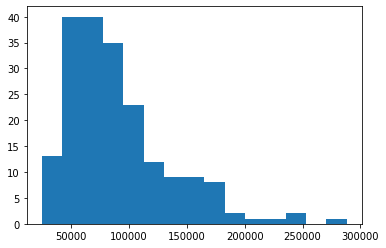

In [39]:
plt.hist(y_array,15)

In [40]:
#Création de niveau de salaires entre 0 et 8

y_class0 = np.where(y_array > 180000, 0, y_array)
y_class1 = np.where(y_class0 > 150000, 1, y_class0)
y_class2 = np.where(y_class1 > 120000, 2, y_class1)
y_class3 = np.where(y_class2 > 100000, 3, y_class2)
y_class4 = np.where(y_class3 > 85000, 4, y_class3)
y_class5 = np.where(y_class4 > 70000, 5, y_class4)
y_class6 = np.where(y_class5 > 60000, 6, y_class5)
y_class7 = np.where(y_class6 > 50000, 7, y_class6)
y_class8 = np.where(y_class7 > 10, 8, y_class7)

(array([ 7.,  0.,  7., 10., 32., 32., 29., 18., 13., 12., 10.,  8.,  6.,
         4.,  8.]),
 array([     0.,  12000.,  24000.,  36000.,  48000.,  60000.,  72000.,
         84000.,  96000., 108000., 120000., 132000., 144000., 156000.,
        168000., 180000.]),
 <a list of 15 Patch objects>)

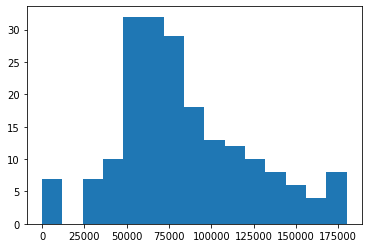

In [41]:
plt.hist(y_class0,15)

(array([22.,  0.,  3.,  7., 11., 28., 27., 26., 18., 12., 10., 11.,  8.,
         4.,  9.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000., 110000., 120000., 130000.,
        140000., 150000.]),
 <a list of 15 Patch objects>)

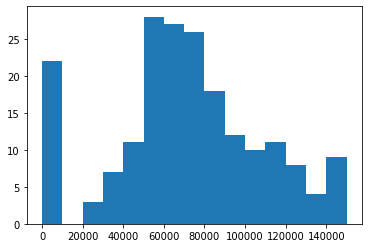

In [42]:
plt.hist(y_class1,15)

(array([41.,  0.,  0.,  3.,  7.,  7., 20., 21., 23., 21., 17.,  9., 10.,
        12.,  5.]),
 array([     0.,   8000.,  16000.,  24000.,  32000.,  40000.,  48000.,
         56000.,  64000.,  72000.,  80000.,  88000.,  96000., 104000.,
        112000., 120000.]),
 <a list of 15 Patch objects>)

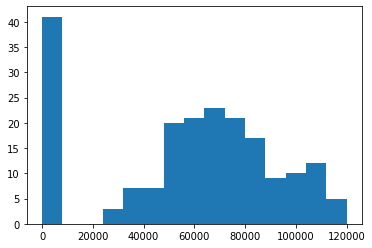

In [43]:
plt.hist(y_class2,15)

(array([62.,  0.,  0.,  1.,  3.,  6.,  6., 16., 17., 17., 16., 20., 16.,
         7.,  9.]),
 array([     0.        ,   6666.66666667,  13333.33333333,  20000.        ,
         26666.66666667,  33333.33333333,  40000.        ,  46666.66666667,
         53333.33333333,  60000.        ,  66666.66666667,  73333.33333333,
         80000.        ,  86666.66666667,  93333.33333333, 100000.        ]),
 <a list of 15 Patch objects>)

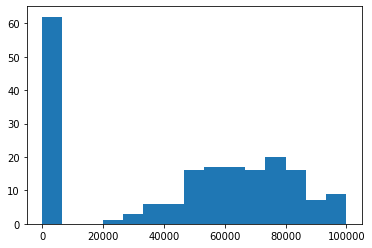

In [44]:
plt.hist(y_class3,15)

(array([80.,  0.,  0.,  0.,  1.,  4.,  5.,  4., 14., 15., 10., 18., 11.,
        19., 15.]),
 array([    0.        ,  5666.66666667, 11333.33333333, 17000.        ,
        22666.66666667, 28333.33333333, 34000.        , 39666.66666667,
        45333.33333333, 51000.        , 56666.66666667, 62333.33333333,
        68000.        , 73666.66666667, 79333.33333333, 85000.        ]),
 <a list of 15 Patch objects>)

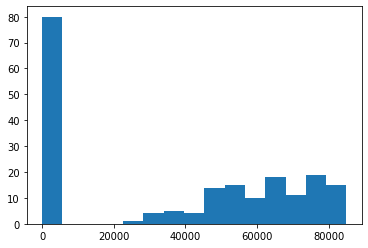

In [45]:
plt.hist(y_class4,15)

(array([118.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   5.,   4.,  13.,
          8.,  16.,  10.,  15.]),
 array([    0.        ,  4666.66666667,  9333.33333333, 14000.        ,
        18666.66666667, 23333.33333333, 28000.        , 32666.66666667,
        37333.33333333, 42000.        , 46666.66666667, 51333.33333333,
        56000.        , 60666.66666667, 65333.33333333, 70000.        ]),
 <a list of 15 Patch objects>)

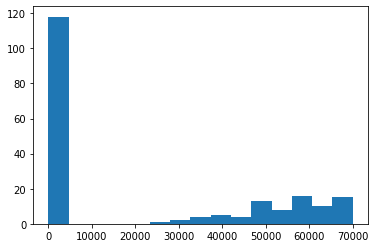

In [46]:
plt.hist(y_class5,15)

(array([143.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   3.,   3.,
          4.,  14.,   6.,  16.]),
 array([    0.,  4000.,  8000., 12000., 16000., 20000., 24000., 28000.,
        32000., 36000., 40000., 44000., 48000., 52000., 56000., 60000.]),
 <a list of 15 Patch objects>)

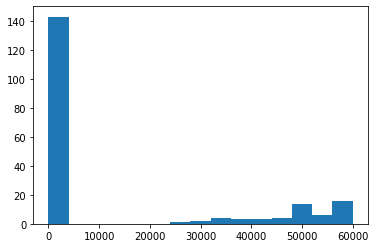

In [47]:
plt.hist(y_class6,15)

(array([170.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   3.,
          3.,   3.,   3.,  10.]),
 array([    0.        ,  3333.33333333,  6666.66666667, 10000.        ,
        13333.33333333, 16666.66666667, 20000.        , 23333.33333333,
        26666.66666667, 30000.        , 33333.33333333, 36666.66666667,
        40000.        , 43333.33333333, 46666.66666667, 50000.        ]),
 <a list of 15 Patch objects>)

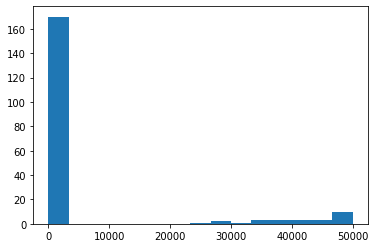

In [48]:
plt.hist(y_class7,15)

(array([ 7., 15.,  0., 19.,  0., 21.,  0., 18.,  0., 38.,  0., 25.,  0.,
        27., 26.]),
 array([0.        , 0.53333333, 1.06666667, 1.6       , 2.13333333,
        2.66666667, 3.2       , 3.73333333, 4.26666667, 4.8       ,
        5.33333333, 5.86666667, 6.4       , 6.93333333, 7.46666667,
        8.        ]),
 <a list of 15 Patch objects>)

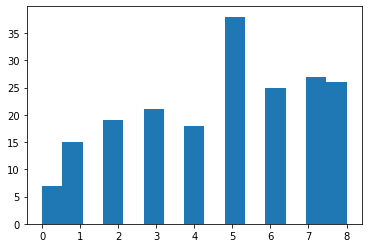

In [49]:
plt.hist(y_class8,15)

In [50]:
np.unique(y_class8)

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [51]:
y_class = y_class8.astype(np.int)

In [52]:
#2. Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=0)

In [58]:
#4. Construire le modèle avec -> from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

modele = LogisticRegression(solver='lbfgs')
modele.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_predict = modele.predict(X_test)
y_predict

array([3, 7, 1, 5, 5, 5, 8, 5, 5, 3, 7, 7, 5, 8, 5, 5, 5, 5, 1, 8, 5, 5,
       8, 5, 5, 5, 5, 8, 5, 5, 3, 5, 5, 1, 7, 3, 5, 4, 8, 4, 8, 8, 5, 7,
       5, 8, 5, 5, 5])

In [60]:
#accuracy
metrics.accuracy_score(y_test, y_predict)

0.30612244897959184

In [61]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predict)

array([[ 2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  2,  0,  1,  1],
       [ 0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0,  1],
       [ 0,  0,  1,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  1,  1],
       [ 0,  0,  0,  0,  5,  0,  1,  5],
       [ 0,  0,  0,  1,  2,  0,  2,  1]])

In [62]:
#Essai en supprimant une colonne de X pour éviter la multi-colinéarité des données: il semblerait qu'on obtienne le même résultat.
X_bis = X[:,:66]
print(X_bis.shape)
print(X.shape)

(196, 66)
(196, 67)


In [63]:
# Diviser le dataset entre training et test set
X_train, X_test, y_train, y_test = train_test_split(X_bis, y_class, test_size=0.25, random_state=0)
# Construire le modèle avec -> from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

modele = LogisticRegression(solver='lbfgs')
modele.fit(X_train, y_train)
y_predict = modele.predict(X_test)
#accuracy
metrics.accuracy_score(y_test, y_predict)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.30612244897959184

In [64]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predict)

array([[ 2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  2,  0,  1,  1],
       [ 0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0,  1],
       [ 0,  0,  1,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  1,  1],
       [ 0,  0,  0,  0,  5,  0,  1,  5],
       [ 0,  0,  0,  1,  2,  0,  2,  1]])

# modèle Kernel_RBF

In [65]:
#Construire le modèle SVM (SVC) avec kernel = rbf et gamma = scale

from sklearn.svm import SVC

modele = SVC(kernel='rbf',gamma = 'scale')
#fit = train the model
modele.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
# Effectuer de nouvelles prédictions

y_predicte = modele.predict(X_test)

In [67]:
y_predicte

array([0, 7, 1, 5, 5, 8, 8, 5, 5, 3, 7, 7, 8, 8, 5, 8, 5, 5, 1, 8, 5, 5,
       8, 8, 5, 5, 8, 8, 5, 8, 3, 8, 5, 1, 7, 0, 5, 4, 8, 4, 8, 8, 5, 7,
       5, 8, 5, 8, 5])

In [68]:
#matrice de confusion

from sklearn import metrics
metrics.confusion_matrix(y_test, y_predicte)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 2],
       [0, 0, 0, 0, 0, 2, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 9, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 4],
       [0, 0, 0, 0, 0, 3, 0, 1, 7],
       [0, 0, 0, 0, 1, 1, 0, 2, 2]])

In [69]:
metrics.accuracy_score(y_test, y_predicte)

0.30612244897959184